# 3-dimensional ODE solution: Lorentz attractor

In [1]:
# This is a standard initalisation code - no need to change this
# It loads basic fast array code, plot library and ODE solver
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
%matplotlib inline
%config InlineBackend.figure_formats={'retina','png'}

## System definition

Let us define the Lorentz system. The `fgen` function "generates" a function with stored values of the parameters.

In [2]:
def f(t, X, sigma, r, b):
    x = X[0]
    y = X[1]
    z = X[2]
    return [ sigma*(y-x),
             r*x-y-x*z,
             x*y-b*z ]
  
def fgen(sigma, r, b):
    return lambda t, X: f(t, X, sigma, r, b)

## Simple solution

Let us just solve the equations for some initial conditions and plot the solution.

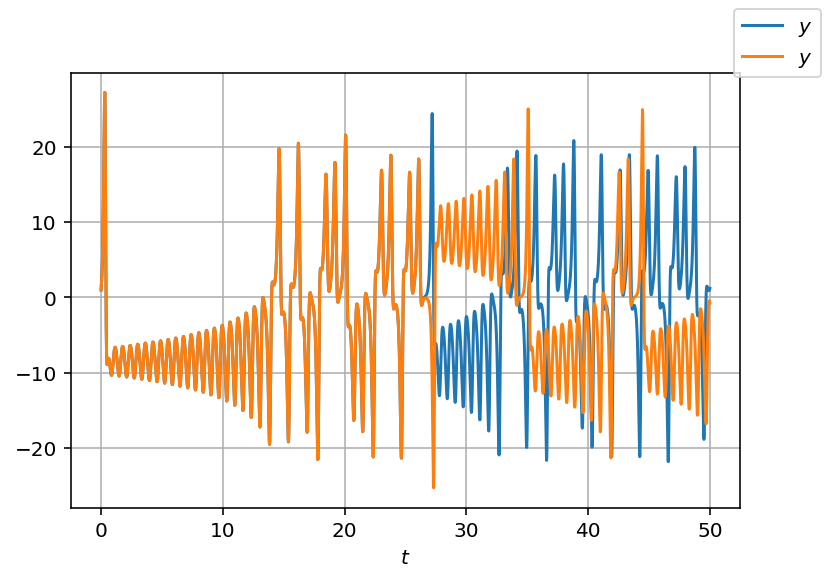

In [7]:
tspan = (0, 50) # time range for the solution
x0 = [1.0, 1.0, 1.0] # initial conditions

t_eval = np.linspace(tspan[0], tspan[1], num=10000) # Make reported solution "smooth"
## Solve, and return solution at t_eval moments
xs1 = solve_ivp(fgen(10., 28., 8.0/3.0), tspan, x0, t_eval=t_eval)

x0 = [1.000001, 1.0, 1.0] # change initial conditions by 1e-6 

t_eval = np.linspace(tspan[0], tspan[1], num=10000) # Make reported solution "smooth"
## Solve, and return solution at t_eval moments
xs2 = solve_ivp(fgen(10., 28., 8.0/3.0), tspan, x0, t_eval=t_eval)

fig2, ax2 = plt.subplots(1)

#ax2.plot(xs1.t, xs1.y[0,:], label="$x$")
ax2.plot(xs1.t, xs1.y[1,:], label="$y$")
#ax2.plot(xs1.t, xs1.y[2,:], label="$z$")

#ax2.plot(xs2.t, xs2.y[0,:], label="$x$")
ax2.plot(xs2.t, xs2.y[1,:], label="$y$")
#ax2.plot(xs2.t, xs2.y[2,:], label="$z$")

ax2.set_xlabel("$t$")
ax2.grid()
fig2.legend()

## Trajectories

Let us plot the trajectory in 3D

Text(0.5, 0, 'z')

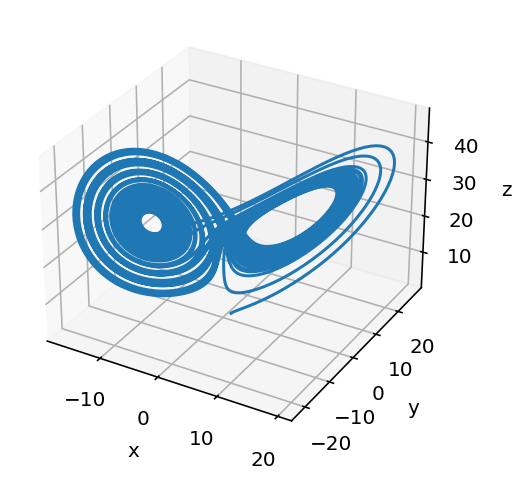

In [10]:
tspan = (0, 50) # time range for the solution
x0 = [1.0, 1.0, 1.0] # initial conditions

t_eval = np.linspace(tspan[0], tspan[1], num=10000) # Make reported solution "smooth"
## Solve, and return solution at t_eval moments
xs1 = solve_ivp(fgen(10., 28., 8.0/3.0), tspan, x0, t_eval=t_eval)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(xs1.y[0,:], xs1.y[1,:], xs1.y[2,:])
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")